<a href="https://colab.research.google.com/github/Shalu-Yadav0811/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

Data Collection and Analysis

---


PIMA Diabetes Dataset

In [70]:
# Loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [71]:
pd.read_csv?


In [72]:
# printing the first 5 rows of the datase
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
print("\nMissing Values:\n", diabetes_dataset.isnull().sum())


Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [74]:
diabetes_dataset.shape

(768, 9)

In [75]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [76]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non-Diabetic

---

1 --> Diabetic

In [77]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [78]:
diabetes_dataset.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,21.0,39.0,30.05,0.336,27.0
1,4.0,140.0,74.0,27.0,0.0,34.25,0.449,36.0


In [79]:
from re import X
# Seperating Data and Labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [80]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [81]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [82]:
scaler = StandardScaler()

In [83]:
scaler.fit(X)

StandardScaler()

In [84]:
standardized_data = scaler.transform(X)  # scaler.fit_transform(X)

In [85]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [86]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [87]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [88]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [89]:
print(X.shape,X_train.shape,X_test.shape)

(768, 8) (614, 8) (154, 8)


In [90]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
# Handle class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_resampled, Y_resampled = sm.fit_resample(X_scaled, Y)

In [92]:
# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42
)

In [93]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
}

In [94]:
# Train and evaluate each model
model_results = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, Y_pred)
    model_results[name] = acc
    print(f"\n🔹 {name} Accuracy: {acc:.4f}")
    print(classification_report(Y_test, Y_pred))
    print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))


🔹 Logistic Regression Accuracy: 0.7500
              precision    recall  f1-score   support

           0       0.76      0.73      0.74        99
           1       0.74      0.77      0.76       101

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

Confusion Matrix:
 [[72 27]
 [23 78]]

🔹 Decision Tree Accuracy: 0.7300
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        99
           1       0.74      0.72      0.73       101

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200

Confusion Matrix:
 [[73 26]
 [28 73]]

🔹 Random Forest Accuracy: 0.7950
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        99
           1       0.77      0.84      0.81       101

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:29:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<ipython-input-95-c87f09328d7f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette="coolwarm")


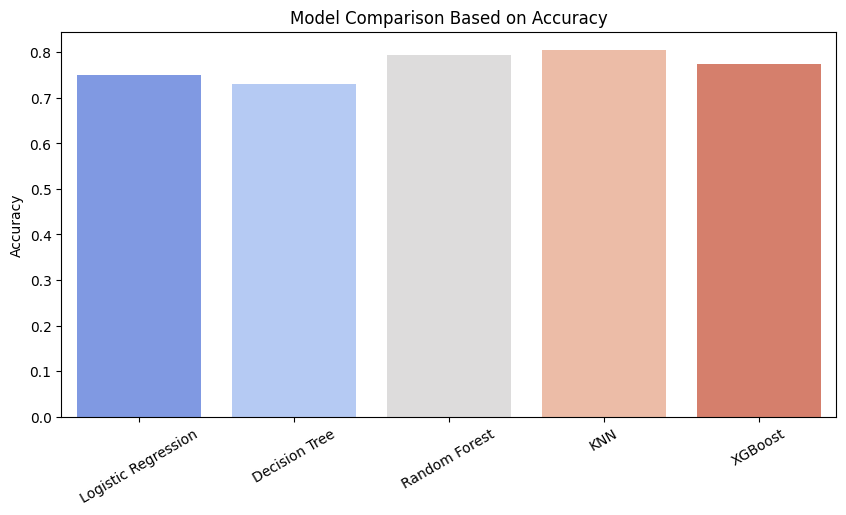

In [95]:
# Model Comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(model_results.keys()), y=list(model_results.values()), palette="coolwarm")
plt.title("Model Comparison Based on Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()

In [96]:
# Feature Importance (for Random Forest)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, Y_train)
importances = rf_model.feature_importances_

<ipython-input-97-e18353698cbb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diabetes_dataset.drop(columns=["Outcome"]).columns, y=importances, palette="viridis")


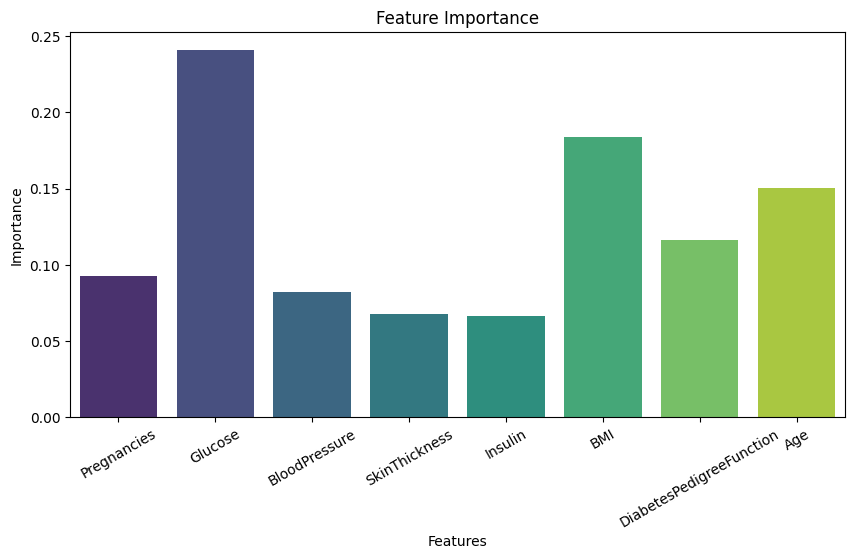

In [97]:
# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=diabetes_dataset.drop(columns=["Outcome"]).columns, y=importances, palette="viridis")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance")
plt.xticks(rotation=30)
plt.show()

In [98]:
# Hyperparameter Tuning for Random Forest
param_grid = {"n_estimators": [50, 100, 200], "max_depth": [None, 5, 10]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, Y_train)
best_rf = grid_search.best_estimator_

In [99]:
print("\n Best Random Forest Model:", grid_search.best_params_)


 Best Random Forest Model: {'max_depth': None, 'n_estimators': 100}


Training the Model

In [100]:
classifier = svm.SVC(kernel='linear')

In [101]:
#training the support vector machine(svm) Classifier
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

---

Accuracy Score

In [102]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [103]:
print('Accuracy Score of the training data : ',training_data_accuracy)

Accuracy Score of the training data :  0.76375


In [104]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [105]:
print('Accuracy Score of the test data : ',test_data_accuracy)

Accuracy Score of the test data :  0.745


Making a Predictive System

In [106]:
input_data=(4,110,92,0,0,37.6,0.191,30)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardize the input data as we have done before for training data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 4.00000000e+00  1.10000000e+02  9.20000000e+01 -1.00613962e-16
   3.00685403e-17  3.76000000e+01  1.91000000e-01  3.00000000e+01]]
[1]
The person is diabetic


In [107]:
input_data=(5,166,72,19,175,25.8,0.587,51)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardize the input data as we have done before for training data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[  5.    166.     72.     19.    175.     25.8     0.587  51.   ]]
[1]
The person is diabetic
